In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

In [2]:
df = pd.read_csv("Dat.csv")

In [3]:
x = df.drop(["DV1"], axis=1)
y = df[['DV1']]

In [4]:
x_tn, x_ts, y_tn, y_ts = train_test_split(x,y, test_size=0.3)

In [5]:
XGB = XGBClassifier()
XGB.fit(x_tn,y_tn);

In [6]:
print('Accuracy of XGB classifier on training set: {:.2f}'.format(XGB.score(x_tn,y_tn)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(XGB.score(x_ts,y_ts)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.60


In [7]:
partial_dependence(XGB, x_tn, [0], kind='legacy'); #One-way pd plot with one feature 0
partial_dependence(XGB, x_tn, [0, 2], kind='legacy'); # two seperate one-way pd plot with feature 0 and 5
partial_dependence(XGB, x_tn, [(0, 2)], kind='legacy'); # two way pd plot with feature 0 and 5 

Average Value indicate the change in predicted probability of being "1" .

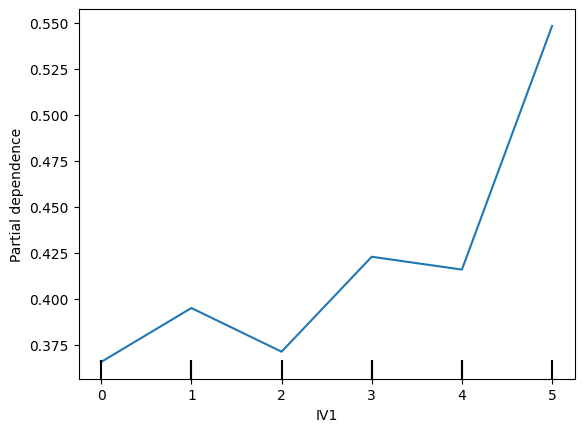

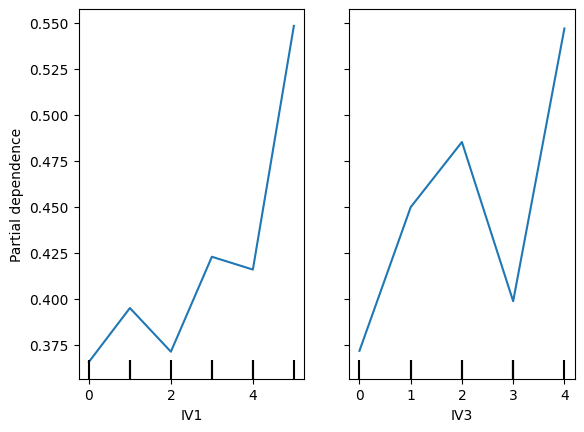

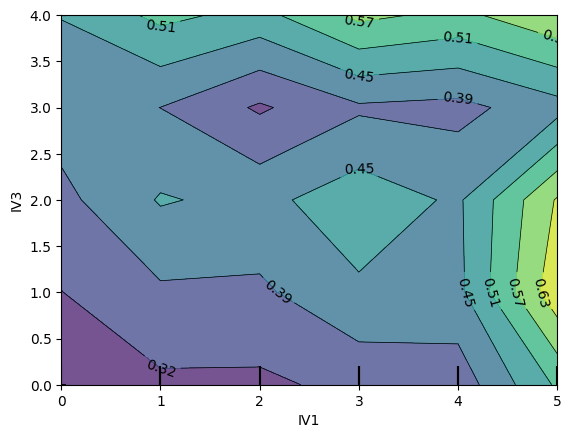

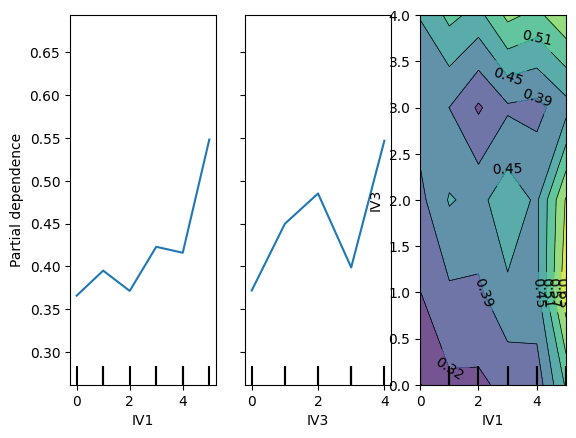

In [8]:
PartialDependenceDisplay.from_estimator(XGB,x_tn,[0])
PartialDependenceDisplay.from_estimator(XGB,x_tn,[0, 2])
PartialDependenceDisplay.from_estimator(XGB,x_tn,[(0, 2)])
PartialDependenceDisplay.from_estimator(XGB,x_tn,[0,2,(0, 2)])